## Theory Overview: Stability of Neuronal Coupling via the Restricted Hessian

## Manifold Stability and the Symmetric‐Units Example

### 1. Manifold Stability (General Concept)

In a **gradient flow** system, parameters $\theta$ evolve over time according to 
$$
\frac{d\theta}{dt} \;=\; -\,\nabla f(\theta),
$$
where $f(\theta)$ is the loss function. A **manifold** $M\subset \mathbb{R}^n$ is said to be *invariant* under this flow if, whenever $\theta(0)$ lies on $M$, the trajectory $\theta(t)$ **remains** on $M$ for all $t>0$. In that case, the gradient $\nabla f(\theta)$ is always *tangent* to $M$ for any $\theta\in M$.  

An **additional** property we often want is *stability*: if we start *near* the manifold $M$, will the flow bring us *closer* to $M$? If so, we say the manifold is **locally stable** or **attracting**. Formally, if the parameters deviate slightly off $M$, a stable manifold implies the dynamics push them back toward $M$.

---

### 2. Example: Symmetric Units in an MLP

Consider a multi‐layer perceptron (MLP) with many neurons. Each neuron $i$ has:
- An *incoming weight vector* $W_i$, i.e. its row in the layer’s weight matrix (plus possibly a bias $b_i$).
- An *outgoing weight vector* in the **next** layer’s weight matrix (i.e. a column if you view that matrix from the next layer’s perspective).

Now suppose two neurons, $i$ and $j$, have **identical (or nearly identical)** incoming weights ($W_i \approx W_j$) and identical biases ($b_i \approx b_j$) as well as *identical outgoing weights*. Then the set of all parameters $\theta$ that enforce “$W_i = W_j$, $b_i = b_j$, and outgoing weights also equal” is a **manifold** in parameter space.  

1. **Invariance:**  
   - If your parameter $\theta$ lies exactly on this “symmetry manifold,” the gradient $\nabla f(\theta)$ typically satisfies $\nabla f(\theta)\big|_{W_i} = \nabla f(\theta)\big|_{W_j}$.  
   - This implies that under gradient descent, the updates for units $i$ and $j$ remain identical, so the parameters for those two neurons move *together*, keeping $W_i$ and $W_j$ (and $b_i$, $b_j$) equal at all times.  

2. **Stable Symmetry:**  
   - We further ask if small deviations off that manifold (i.e. $W_i \neq W_j$ by a small amount) get pulled **back** to it by the gradient flow.  
   - If so, we say the manifold of “coupled units” is **locally stable**: that means if at some point in training they are nearly identical, the gradient flow *reinforces* that similarity rather than letting them diverge.

Hence, for two symmetric neurons, the **subspace** of parameters satisfying $W_i = W_j$ and $b_i = b_j$ is an **invariant manifold**. Demonstrating **local stability** amounts to showing that, near that point, the gradient flow *reduces* the difference $W_i - W_j$, $b_i - b_j$.

---

### 3. Local Stability Criterion (Sketch)

A common way to test local stability is:
1. Identify the **manifold** $M$: in this case, $M = \{\theta : W_i = W_j,\ b_i = b_j,\ \dots\}$.  
2. Check the **gradient** is tangent at $M$: ensures *invariance*.  
3. Study the **Hessian** $\nabla^2 f(\theta_0)$ at a point $\theta_0 \in M$. In particular, look at directions **normal** to $M$—i.e., directions that *break* the symmetry (differences $W_i - W_j$).  
   - If the Hessian is *positively curved* in those normal directions (for gradient *descent*), small deviations get pushed back to $M$.  
   - Concretely, that means the restricted Hessian on the difference directions is **positive definite**, which implies a restoring force toward the manifold.

---

### 4. Conclusion

- **Manifold Stability:** A manifold $M$ of parameters is stable under gradient descent if starting near $M$ keeps you (or pushes you) closer to $M$.  
- **Symmetric Neurons:** Having two neurons with identical weights/biases is a special case of such a manifold. If the gradient flow is tangent to that manifold (no immediate push off it) *and* any small deviations are corrected (positive curvature in the difference directions), then *neuron coupling* is stable in the local neighborhood.  

This concept underscores why, in practice, if two neurons become nearly identical, they may remain so (or become even more similar) throughout training—reflecting a **stable** symmetry in the parameter space.

In a multi-layer neural network (MLP), each “unit” (or neuron) has associated trainable parameters—most notably the incoming weights and the bias for that neuron. When we **couple** two neurons, we deliberately constrain or make their parameters very similar so that they effectively share “behavior.” 

### 1. Manifold of Coupled Neurons

If we denote two neurons in the same layer by indices $i$ and $j$, then coupling them amounts to imposing a relationship such as
$$
    W_i \;\approx\; W_j, 
    \quad
    b_i \;\approx\; b_j,
$$
where $W_i, W_j$ are the *rows* (or *columns*, depending on context) in the weight matrix corresponding to neurons $i$ and $j$, and $b_i, b_j$ are their biases.

In a strict sense, **perfect** coupling would set $W_i = W_j$ and $b_i = b_j$.  Geometrically, this means the parameters lie on a *subspace* (or *manifold*) defined by those equality constraints.

### 2. Gradient Flow and Stability

We typically train neural networks via **gradient descent** on a loss function $f(\theta)$, where $\theta$ collects all network parameters.  For local stability analysis, we consider a trajectory $\dot{\theta}(t) = -\,\nabla f(\theta(t))$.  

- If we start exactly on the “coupled manifold,” meaning $W_i = W_j$ and $b_i = b_j$, and the flow **keeps** us there (i.e., no forces pulling us off), that subspace is *invariant*.  
- More importantly, we want to see if *small deviations* off this manifold get pulled back (stable) or pushed away (unstable).

### 3. Hessian Restriction and Normal Directions

To test local stability near a point $\theta_0$ on the coupled manifold, we look at the **Hessian** $\nabla^2 f(\theta_0)$.  The directions “normal” to the manifold are those that *break* the coupling constraints—for instance, a small difference $\delta = (W_i - W_j)$.

1. **Invariance Condition:**  
   If $\theta_0$ lies on the coupled manifold, for the manifold to be invariant under gradient descent, the gradient $\nabla f(\theta_0)$ must *respect* the coupling constraints (i.e., no immediate push off the manifold).

2. **Stability Condition (Positive Curvature):**  
   In gradient descent, small deviations in a normal direction $\delta$ are pushed back to the manifold if the Hessian $\nabla^2 f(\theta_0)$ is **positive** in that direction.  Formally, we want
   $$
     \delta^\top \,\nabla^2 f(\theta_0)\,\delta \;>\; 0
   $$
   for any $\delta$ that lies in the normal space.  Concretely, if $\delta$ is the difference of parameters between neurons $i$ and $j$, then the 2×2 (or small block) of the Hessian capturing partial derivatives w.r.t. these neurons’ parameters should be **positive definite**.

### 4. The Experiment

1. **Coupling Operation:**  
   - We select neurons $i$ and $j$ in layer $\ell$ and make their parameters similar by copying $W_i \approx W_j$ and $b_i \approx b_j$.  
   - We optionally add a small random perturbation so they are not *exactly* identical.

2. **Hessian Computation:**  
   - We compute the Hessian of the loss function w.r.t. the relevant parameters (in practice, w.r.t. the entire layer or just the biases).  
   - We extract the submatrix of that Hessian that corresponds specifically to $W_i, W_j$ (or $b_i, b_j$), which can be visualized as a 2×2 block if we look at just the pair $\{i, j\}$.  

3. **Testing Positive Definiteness:**  
   - If the 2×2 Hessian block 
     $$
       \begin{pmatrix}
         H_{ii} & H_{ij}\\
         H_{ij} & H_{jj}
       \end{pmatrix}
     $$
     is **positive definite**, it means any infinitesimal difference between neurons $i$ and $j$ leads to an *increase* in loss—and thus gradient descent tends to “push” the parameters back together.  Mathematically, that requires $H_{ii}>0$ and $\det>0$.  
   - In simpler terms, the difference direction $\delta = W_i - W_j$ (or $b_i - b_j$) is a direction of *positive* curvature.  

### 5. Conclusion

By examining the **restricted Hessian** in these “difference directions,” we can test **whether coupling two neurons is locally stable** under gradient descent. Positive curvature in that sub-block indicates that if they begin coupled (equal parameters) and deviate slightly, the training dynamics will bring them back together. If the curvature is negative or indefinite, then small deviations grow larger, implying the coupling is *unstable*.

In summary:

- **Coupled Manifold:** Parameters satisfying $W_i = W_j, b_i = b_j$.  
- **Local Stability Check:** Restrict the Hessian to the subspace normal to the manifold (the difference directions).  
- **Positive Definiteness:** Ensures stable coupling; negative or indefinite curvature indicates potential instability.

This theoretical framework underlies the experiment: **we couple two neurons, measure the Hessian’s curvature in the difference directions, and then draw conclusions about the stability of that coupling under gradient descent.**

In [117]:
import tqdm 
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Subset
import pandas as pd
import gc
import torch.nn.functional as F
# from torch.autograd.functional import hessian
from torch.func import jacrev, hessian

# Add wandb import
import wandb


# Set random seeds for reproducibility
torch.manual_seed(40)
np.random.seed(40)

# Check if CUDA is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class ConfigurableMLP(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_sizes, activation_type='relu', eps = 1e-5):
        super(ConfigurableMLP, self).__init__()
        
        # Set activation function based on input parameter
        if activation_type == 'relu':
            self.activation = nn.ReLU()
        elif activation_type == 'tanh':
            self.activation = nn.Tanh()
        elif activation_type == 'sigmoid':
            self.activation = nn.Sigmoid()
        else:
            raise ValueError(f"Unsupported activation type: {activation_type}")

        self.eps = eps 
        
        # Create layers list starting with flattening the input
        self.flatten = nn.Flatten()
        
        # Build layer architecture
        layer_sizes = [input_dim] + hidden_sizes + [output_dim]
        self.layers = nn.ModuleList()
        
        for i in range(len(layer_sizes) - 1):
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i+1]))

    def bn(self, x):
        # Calculate batch statistics
        batch_mean = x.mean(0, keepdim=True)
        batch_var = x.var(0, unbiased=False, keepdim=True)
        
        # Normalize
        x_normalized = (x - batch_mean) / torch.sqrt(batch_var + self.eps)
        return x_normalized
            
    def forward(self, x):
        x = self.flatten(x)
        
        for i, layer in enumerate(self.layers):
            x = layer(x)
            # Apply activation to all but the last layer
            if i < len(self.layers) - 1:
                x = self.bn(x) 
                x = self.activation(x)
                
        return x
    
    def get_layer_weights(self, layer_idx):
        """Return the weight matrix of a specific layer"""
        return self.layers[layer_idx].weight
        
    def couple_units(self, layer_idx, unit_i, unit_j, epsilon=0.01):
        """
        Couple units i and j in layer layer_idx by making their incoming 
        and outgoing weights similar with a small perturbation.
        """
        # Handle incoming weights (weights of the specified layer)
        if layer_idx < len(self.layers):
            # Get the weights of the specified layer (but don't modify directly)
            weights = self.get_layer_weights(layer_idx).clone()
            
            # Make unit_j similar to unit_i with small perturbation
            # We keep unit_i as is and set unit_j to be similar
            noise = torch.randn_like(weights[unit_i]) * epsilon * torch.mean(weights[unit_i]**2)**0.5
            
            # Create new weights tensor with the modified values
            new_weights = weights.clone()
            new_weights[unit_j] = weights[unit_i] + noise
            
            # Update the layer weights with the new tensor
            self.layers[layer_idx].weight.data = new_weights
            
            # Debug: verify the coupling
            cosine_sim = self.measure_unit_similarity(layer_idx, unit_i, unit_j, 'cosine')
            print(f"DEBUG - After coupling incoming weights: cosine similarity = {cosine_sim:.4f}")
            # Log the coupling metrics to wandb
        
        # Handle outgoing weights (weights of the next layer)
        if layer_idx + 1 < len(self.layers):
            # Get the weights of the next layer (but don't modify directly)
            next_weights = self.get_layer_weights(layer_idx + 1).clone()
            
            # For outgoing weights, we need to process the columns
            # Extract the columns corresponding to unit_i and unit_j
            outgoing_i = next_weights[:, unit_i].clone()
            
            # Create perturbation for outgoing weights
            out_noise = torch.randn_like(outgoing_i) * epsilon * torch.norm(outgoing_i)
            
            # Set unit_j's outgoing weights based on unit_i with noise
            next_weights[:, unit_j] = outgoing_i + out_noise
            
            # Update the next layer weights
            self.layers[layer_idx + 1].weight.data = next_weights
            
            # Show the outgoing similarity
            cos_sim_out = torch.dot(next_weights[:, unit_i], next_weights[:, unit_j]) / (
                torch.norm(next_weights[:, unit_i]) * torch.norm(next_weights[:, unit_j]))
            print(f"DEBUG - After coupling outgoing weights: cosine similarity = {cos_sim_out.item():.4f}")
            # Log the coupling metrics to wandb
            wandb.log({"outgoing_weights_cosine_similarity": cos_sim_out.item()})
    
    def measure_unit_similarity(self, layer_idx, unit_i, unit_j, metric='cosine'):
        """
        Measure the similarity between units i and j in layer layer_idx.
        """
        weights = self.get_layer_weights(layer_idx)
        
        if metric == 'cosine':
            # Compute cosine similarity between incoming weight vectors
            norm_i = torch.norm(weights[unit_i])
            norm_j = torch.norm(weights[unit_j])
            
            if norm_i > 0 and norm_j > 0:
                cos_sim = torch.dot(weights[unit_i], weights[unit_j]) / (norm_i * norm_j)
                return cos_sim.item()
            else:
                return 0.0
        elif metric == 'euclidean':
            # Compute Euclidean distance between incoming weight vectors
            distance = torch.norm(weights[unit_i] - weights[unit_j])
            return distance.item()
        else:
            raise ValueError(f"Unsupported similarity metric: {metric}")




def layer_hessian(model, criterion, layer_index, row_indices=None, col_indices=None):
    N, M = model.layers[layer_index].weight.shape 
    device = model.layers[layer_index].weight.device
    if row_indices is None:
        row_indices = range(N)
    if col_indices is None:
        col_indices = range(M)
    n = len(row_indices)
    m = len(col_indices)
    w = torch.zeros((n,m),device=device)
    b = torch.zeros((n), device=device)
    def f(params, x, y):
        x = model.flatten(x)
        w, b = params
        R = torch.eye(N, device=device)[:,row_indices]
        C = torch.eye(M, device=device)[col_indices,:]
        
        W = R @ w @ C
        B = R @ b
        h = x
        for i, layer in enumerate(model.layers):
            
            h = h@(layer.weight + (W if i==layer_index else 0)).T  + layer.bias + (B if i==layer_index else 0)
            if i < len(model.layers) - 1:
                h = model.bn(h)
                h = model.activation(h)
        loss = criterion(h, y) 
        return loss 

    def hess(x,y):
        return hessian(f,)((w,b), x, y)
    return hess 


def couping_hessian(x, y, model, criterion, layer_index, unit_i, unit_j, sampling_n = None):
    if sampling_n is not None:
        sampled_units = range(sampling_n)
    else:
        sampled_units = None
    hess1 = layer_hessian(model, criterion, layer_index, row_indices=[unit_i, unit_j], col_indices=sampled_units)
    hess2 = layer_hessian(model, criterion, layer_index+1, row_indices=sampled_units, col_indices=[unit_i, unit_j])
    H1 = hess1(x, y)
    H2 = hess2(x, y)
    h1,b1 = H1[0][0], H1[1][1]
    h2, b2 = H2[0][0], H2[1][1]
    # compute the hessian restriced to the sub-space orthogonal to the coupled units  
    h1 = h1[0,:,0,:] + h1[1,:,1,:] - h1[0,:,1,:] - h1[1,:,0,:]
    h2 = h2[:, 0,:,0] + h2[:, 1,:,1] - h2[:,0,:,1] - h2[:, 1,:,0]
    incoming_Hessian_eigvals = torch.linalg.eigvalsh(h1)
    outgoign_Hessian_eigvals = torch.linalg.eigvalsh(h2)
    
    return incoming_Hessian_eigvals, outgoign_Hessian_eigvals

    
def cosine_similarity(a: torch.Tensor, b: torch.Tensor) -> torch.Tensor:
    # Add a small epsilon for numerical stability.
    eps = 1e-8
    return torch.dot(a, b) / (a.norm() * b.norm() + eps)

def measure_coupling_metrics(model,  i: int, j: int, layer_index: int, inputs, labels, criterion):
    metrics = {}

    ### 1. Incoming Weights (from layer layer_index)
    # Assume a Linear layer with weight of shape (out_features, in_features)
    layer = model.layers[layer_index]
    W = layer.weight.data         # shape: (out_features, in_features)
    dW = layer.weight.grad.data   # same shape
    # For incoming weights, the weight vector for neuron i is the i-th row.
    w1 = W[i]  # shape: (in_features,)
    w2 = W[j]
    dw1 = dW[i]
    dw2 = dW[j]

    incoming = {}
    incoming['w1_norm'] = w1.norm().item()
    incoming['w2_norm'] = w2.norm().item()
    incoming['dw1_norm'] = dw1.norm().item()
    incoming['dw2_norm'] = dw2.norm().item()
    incoming['cos_w1_w2'] = cosine_similarity(w1, w2).item()
    incoming['cos_dw1_dw2'] = cosine_similarity(dw1, dw2).item()

    # Define the difference (or "coupling noise") vector.
    e = w1 - w2
    incoming['w1_w2_norm'] = e.norm().item()
    incoming['dw1_dw2_norm'] = (dw1-dw2).norm().item()
    incoming['cos_dw1,w1-w2'] = cosine_similarity(dw1, w1-w2).item()
    incoming['cos_dw2,w2-w1'] = cosine_similarity(dw2, w2-w1).item()
    incoming['cos_dw1_dw2,w1_w2'] = cosine_similarity(dw1 - dw2, w1-w2).item()
    incoming['ip_dw1_dw2,w1_w2'] = torch.dot(dw1 - dw2, w1-w2).item()

        
    ### 2. Outgoing Weights (from the next layer, layer_index+1)
    # For outgoing weights, we take the columns corresponding to the same unit indices.
    # In a Linear layer the weight shape is (out_features, in_features) so the column i
    # corresponds to the incoming weights for neuron i from the previous layer.
    next_layer = model.layers[layer_index + 1]
    W_next = next_layer.weight.data       # shape: (out_features_next, in_features_next)
    dW_next = next_layer.weight.grad.data
    # For outgoing coupling, select the columns i and j.
    w1 = W_next[:, i]   # shape: (out_features_next,)
    w2 = W_next[:, j]
    dw1 = dW_next[:, i]
    dw2 = dW_next[:, j]

    outgoing = {}
    outgoing['w1_norm'] = w1.norm().item()
    outgoing['w2_norm'] = w2.norm().item()
    outgoing['dw1_norm'] = dw1.norm().item()
    outgoing['dw2_norm'] = dw2.norm().item()
    outgoing['cos_w1_w2'] = cosine_similarity(w1, w2).item()
    outgoing['cos_dw1_dw2'] = cosine_similarity(dw1, dw2).item()

    # Define the difference (or "coupling noise") vector.
    e = w1 - w2
    outgoing['w1_w2_norm'] = e.norm().item()
    outgoing['dw1_dw2_norm'] = (dw1-dw2).norm().item()
    outgoing['cos_dw1,w1-w2'] = cosine_similarity(dw1, w1-w2).item()
    outgoing['cos_dw2,w2-w1'] = cosine_similarity(dw2, w2-w1).item()
    outgoing['cos_dw1_dw2,w1_w2'] = cosine_similarity(dw1 - dw2, w1-w2).item()
    outgoing['ip_dw1_dw2,w1_w2'] = torch.dot(dw1 - dw2, w1-w2).item()

    in_He, out_He = couping_hessian(inputs, labels, model, criterion, layer_index, i, j,sampling_n=100)
    
    incoming['He_eigs'] = in_He.tolist() 
    outgoing['He_eigs'] = out_He.tolist() 


    for k,v in incoming.items():
        metrics[f'incoming_{k}'] = v
        
    for k,v in outgoing.items():
        metrics[f'outgoing_{k}'] = v

    metrics['incoming_He_min'] = in_He.min().item()
    metrics['incoming_He_max'] = in_He.max().item() 
    metrics['incoming_He_mean'] = in_He.mean().item()
    metrics['incoming_He_std'] = in_He.std().item()
    
    metrics['outgoing_He_min'] = out_He.min().item()
    metrics['outgoing_He_max'] = out_He.max().item()
    metrics['outgoing_He_mean'] = out_He.mean().item()
    metrics['outgoing_He_std'] = out_He.std().item()

    return metrics



def load_cifar10_continual(first_classes, second_classes, batch_size=128):
    """
    Load CIFAR-10 dataset split for continual learning.
    first_classes and second_classes should be lists of class indices.
    """
    # Define transformations
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    
    # Download and load the training dataset
    full_trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                              download=True, transform=transform)
    full_testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                             download=True, transform=transform)
    
    # Create subsets for first task (first set of classes)
    first_train_indices = [i for i, (_, label) in enumerate(full_trainset) if label in first_classes]
    first_test_indices = [i for i, (_, label) in enumerate(full_testset) if label in first_classes]
    
    first_trainset = Subset(full_trainset, first_train_indices)
    first_testset = Subset(full_testset, first_test_indices)
    
    # Create subsets for second task (second set of classes)
    second_train_indices = [i for i, (_, label) in enumerate(full_trainset) if label in second_classes]
    second_test_indices = [i for i, (_, label) in enumerate(full_testset) if label in second_classes]
    
    second_trainset = Subset(full_trainset, second_train_indices)
    second_testset = Subset(full_testset, second_test_indices)
    
    # Determine number of workers based on device
    # When using CUDA, we want to use multiple workers for the DataLoader
    # When using CPU, fewer workers might be better
    num_workers = 2 if device.type == 'cuda' else 0
    
    # Pin memory for faster data transfer to GPU
    pin_memory = device.type == 'cuda'
    
    # Create dataloaders
    first_trainloader = DataLoader(
        first_trainset, 
        batch_size=batch_size,
        shuffle=True, 
        num_workers=num_workers, 
        pin_memory=pin_memory
    )
    
    first_testloader = DataLoader(
        first_testset, 
        batch_size=batch_size, 
        shuffle=False, 
        num_workers=num_workers, 
        pin_memory=pin_memory
    )
    
    second_trainloader = DataLoader(
        second_trainset, 
        batch_size=batch_size, 
        shuffle=True, 
        num_workers=num_workers, 
        pin_memory=pin_memory
    )
    
    second_testloader = DataLoader(
        second_testset, 
        batch_size=batch_size, 
        shuffle=False, 
        num_workers=num_workers, 
        pin_memory=pin_memory
    )
    
    print(f"First task: {len(first_trainset)} training samples, {len(first_testset)} test samples")
    print(f"Second task: {len(second_trainset)} training samples, {len(second_testset)} test samples")
    
    # Log dataset information to wandb
    wandb.log({
        "first_task_train_samples": len(first_trainset),
        "first_task_test_samples": len(first_testset),
        "second_task_train_samples": len(second_trainset),
        "second_task_test_samples": len(second_testset)
    })
    
    return (first_trainloader, first_testloader), (second_trainloader, second_testloader)


def train_continual_learning(model, data_loaders, coupling_info, 
                           epochs_first_task=10, epochs_second_task=10, 
                           learning_rate=0.001,):
    # Unpack data loaders
    (first_trainloader, first_testloader), (second_trainloader, second_testloader) = data_loaders
    
    # Extract coupling parameters
    layer_idx = coupling_info['layer']
    unit_i = coupling_info['unit_i']
    unit_j = coupling_info['unit_j']
    epsilon = coupling_info['epsilon']
    
    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Move model to device
    model = model.to(device)
    
    metrics_history = []
    for phi, train_loader,epochs in  ((1,first_trainloader,epochs_first_task), (2,second_trainloader,epochs_second_task)):
        # applying coupling at end of task 1 
        if phi==2:
            print("\n===== Applying unit coupling before phase 2  =====")
            model.couple_units(layer_idx, unit_i, unit_j, epsilon)
            wandb.log({"coupling_applied": True})
        print(f"\n===== Phase {phi} =====")
        step = 0 
        for epoch in range(epochs):
            # Training loop
            model.train()
            running_loss = 0.0
            for i, (inputs, labels) in tqdm.tqdm(enumerate(train_loader),total=len(train_loader)):
                step += 1 
                
                # Move input data to device
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                # Zero the gradients
                optimizer.zero_grad()
                
                # Forward pass
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                # Backward pass and optimize
                loss.backward()
                optimizer.step()
                
                running_loss += loss.item()

                if step % 10 == 0:
                    metrics = measure_coupling_metrics(model, unit_i, unit_j, layer_idx, inputs, labels, criterion)
                    metrics_history.append(metrics)
                
                    # Log metrics to wandb
                    wandb.log({
                        f"phase{phi}/step": step,
                        f"phase{phi}/epoch": epoch,
                        f"phase{phi}/batch_loss": loss.item(),
                        **{f"phase{phi}/coupling/{k}": v for k, v in metrics.items() if k not in ['phase', 'epoch', 'step', 'loss']}
                    })
                
        
            # epoch-level metrics
            model.eval()
            epoch_loss = running_loss / len(train_loader)
            acc_first = evaluate_model(model, first_testloader)
            acc_second = evaluate_model(model, second_testloader)
            metrics = {
                'phase': phi,
                'epoch': epoch,
                'train_loss': epoch_loss,
                'test_accuracies_first': acc_first,
                'test_accuracies_second': acc_second,
            }
            
            # Log epoch metrics to wandb
            wandb.log({
                "epoch": epoch,
                "phase": phi,
                "train_loss": epoch_loss,
                "test_acc_task1": acc_first,
                "test_acc_task2": acc_second,
            })
            
            print(f"Task 1 Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.4f}")
            print(f"  Acc (Task 1): {acc_first:.2f}%, Acc (Task 2): {acc_second:.2f}%")

            
    # print_model(model, layer_idx)
    
    # Clean up to ensure all GPU memory is released
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    gc.collect()
    
    return metrics_history



def evaluate_model(model, dataloader):
    """Evaluate model accuracy on a dataset"""
    correct = 0
    total = 0
    model.eval()  # Set model to evaluation mode
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            # Move data to the appropriate device
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    # Free memory
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    
    return 100 * correct / total if total > 0 else 0


def run_continual_learning_experiment(
    hidden_sizes=[7]*5, 
    activation_type='relu',
    first_classes=[0, 1, 2, 3, 4],  # First 5 CIFAR-10 classes
    second_classes=[5, 6, 7, 8, 9],  # Second 5 CIFAR-10 classes
    couple_layer=1,
    couple_units=(10, 20),
    epsilon=0.01,
    epochs_first_task=5,
    epochs_second_task=5,
    learning_rate=0.001,
    batch_size=128,
    run_name=None,
):
    """Run the complete continual learning experiment"""
    # Initialize wandb
    if run_name is None:
        run_name = f"continual_learning_exp_{activation_type}_{epsilon}_{epochs_first_task}_{epochs_second_task}"
    
    wandb.init(
        project="continual-learning-coupling",
        name=run_name,
        config={
            "hidden_sizes": hidden_sizes,
            "activation_type": activation_type,
            "first_classes": first_classes,
            "second_classes": second_classes,
            "couple_layer": couple_layer,
            "couple_units": couple_units,
            "epsilon": epsilon,
            "epochs_first_task": epochs_first_task,
            "epochs_second_task": epochs_second_task,
            "learning_rate": learning_rate,
            "batch_size": batch_size,
            "device": device.type,
        }
    )
    
    # Get class names for better reporting
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                 'dog', 'frog', 'horse', 'ship', 'truck']
    
    first_class_names = [class_names[i] for i in first_classes]
    second_class_names = [class_names[i] for i in second_classes]
    
    print(f"First task classes: {first_class_names}")
    print(f"Second task classes: {second_class_names}")
    
    # Log class information to wandb
    wandb.config.update({
        "first_class_names": first_class_names,
        "second_class_names": second_class_names
    })
    
    try:
        # Load datasets for continual learning
        data_loaders = load_cifar10_continual(first_classes, second_classes, batch_size=batch_size)
        
        # Calculate input dimensions for CIFAR-10 (3 channels, 32x32 images)
        input_dim = 3 * 32 * 32
        output_dim = 10  # All CIFAR-10 classes
        
        # Create the model
        model = ConfigurableMLP(input_dim, output_dim, hidden_sizes, activation_type)
        print(f"Created MLP with architecture: {input_dim} -> {' -> '.join(map(str, hidden_sizes))} -> {output_dim}")
        print(f"Activation function: {activation_type}")
        
        # Log model architecture to wandb
        wandb.config.update({
            "input_dim": input_dim,
            "output_dim": output_dim,
            "model_architecture": f"{input_dim} -> {' -> '.join(map(str, hidden_sizes))} -> {output_dim}"
        })
        
        # Move model to device
        model = model.to(device)
        
        # Watch model with wandb to track gradients and parameters
        wandb.watch(model, log="all", log_freq=100)
        
        # Coupling parameters
        coupling_info = {
            'layer': couple_layer,
            'unit_i': couple_units[0],
            'unit_j': couple_units[1],
            'epsilon': epsilon
        }
        
        print(f"Will couple units {couple_units[0]} and {couple_units[1]} in layer {couple_layer}, meaning we couple ")
        print(f"rows  {couple_units[0]} and {couple_units[1]} of weight matrix layer {couple_layer}")
        print(f"and columns {couple_units[0]} and {couple_units[1]} of weight matrix layer {couple_layer+1}")
        print(f" using {epsilon:.3f} perturbation")
        
        # Train with continual learning approach
        metrics = train_continual_learning(
            model, 
            data_loaders,
            coupling_info,
            epochs_first_task=epochs_first_task,
            epochs_second_task=epochs_second_task,
            learning_rate=learning_rate,
        )

        model = model.to('cpu')
        
        # Finish wandb run
        wandb.finish()
        
        return model, metrics
    
    except Exception as e:
        # Log any errors
        wandb.log({"error": str(e)})
        wandb.finish()
        raise e
    
    finally:
        # Make sure memory is cleaned up
        gc.collect()
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

if __name__ == "__main__":
    # Run the continual learning experiment
    config = dict(
        first_classes=[0, 1,8,9],  # First 5 CIFAR-10 classes (airplane, auto, ship, truck )
        second_classes=[2, 5, 6, 7, 3,4],  # Second 5 CIFAR-10 classes (dog, frog, horse, bird, cat, deer)
        hidden_sizes=[500,]*6, 
        activation_type='tanh',
        couple_layer=3,  # Second layer (0-indexed)
        couple_units=(0, 1),  # Couple units 0 and 1
        epsilon=0.01,  # Perturbation factor
        epochs_first_task=40,
        epochs_second_task=30,
        learning_rate=0.01,
        batch_size=512,
    )
    experiments = []
    for epochs_first_task in [1,5,10,]:
        print(f'\n\n================= trainig with {epochs_first_task} epochs =================\n\n') 
        config['epochs_first_task'] = epochs_first_task
        for exp_idx in range(5):
            print("\n\n\nexperimental config = ", config)
            model, metrics = run_continual_learning_experiment(**config,)
            experiments.append((config,metrics)) 


Using device: cuda


In [40]:

wandb.init()

In [153]:
config = dict(
    first_classes=[0, 1,2,3,4],  # First 5 CIFAR-10 classes (airplane, auto, ship, truck )
    second_classes=[5,6,7,8,9],  # Second 5 CIFAR-10 classes (dog, frog, horse, bird, cat, deer)
    hidden_sizes=[500,]*6, 
    activation_type='tanh',
    couple_layer=3,  # Second layer (0-indexed)
    couple_units=(0, 1),  # Couple units 0 and 1
    epsilon=0.001,  # Perturbation factor
    epochs_first_task=5,
    epochs_second_task=30,
    learning_rate=0.01,
    batch_size=512,
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ConfigurableMLP(
    input_dim = 3 * 32 * 32 , 
    output_dim = 10, 
    hidden_sizes=config['hidden_sizes'], 
    activation_type=config['activation_type']
)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=config['learning_rate'])
loaders = load_cifar10_continual(config['first_classes'], config['second_classes'], batch_size=config['batch_size'])
(first_trainloader, first_testloader), (second_trainloader, second_testloader)

train_loader = first_trainloader

model.couple_units(config['couple_layer'],unit_i=config['couple_units'][0], unit_j=config['couple_units'][1],epsilon=config['epsilon'])

for epoch in tqdm.trange(config['epochs_first_task']):
    # Training loop
    model.train()
    running_loss = 0.0

    # couple these units every epoch 
    # model.couple_units(layer_index,unit_i, unit_j,epsilon=config['epsilon'])

    
    losses = [] 
    for it, (inputs, labels) in enumerate(train_loader):
        # Move input data to device
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    sim = model.measure_unit_similarity(config['couple_layer'], config['couple_units'][0], config['couple_units'][1])
    loss = np.mean(losses)
    print(f"loss = {loss}, coupling sim = {sim} ")

# model.couple_units(layer_index,unit_i, unit_j,epsilon=config['epsilon'])


Files already downloaded and verified
Files already downloaded and verified
First task: 25000 training samples, 5000 test samples
Second task: 25000 training samples, 5000 test samples
DEBUG - After coupling incoming weights: cosine similarity = 1.0000
DEBUG - After coupling outgoing weights: cosine similarity = 0.9998


 20%|████████████████████▊                                                                                   | 1/5 [00:01<00:07,  1.89s/it]

loss = 1.93450741865197, coupling sim = 0.9995367527008057 


 40%|█████████████████████████████████████████▌                                                              | 2/5 [00:03<00:05,  1.86s/it]

loss = 1.5134355948895823, coupling sim = 0.9995396137237549 


 60%|██████████████████████████████████████████████████████████████▍                                         | 3/5 [00:05<00:03,  1.86s/it]

loss = 1.3578163166435397, coupling sim = 0.9995255470275879 


 80%|███████████████████████████████████████████████████████████████████████████████████▏                    | 4/5 [00:07<00:01,  1.84s/it]

loss = 1.2610807467480094, coupling sim = 0.9995134472846985 


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:09<00:00,  1.86s/it]

loss = 1.2051788398197718, coupling sim = 0.9995145797729492 


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:53<00:00,  5.35s/it]


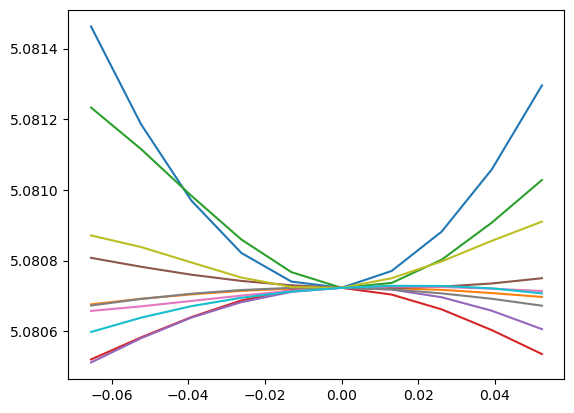

In [154]:
def perturb_loss(model, criterion, layer_index, row_indices=None, col_indices=None, ):
    N, M = model.layers[layer_index].weight.shape 
    device = model.layers[layer_index].weight.device
    if row_indices is None:
        row_indices = range(N)
    if col_indices is None:
        col_indices = range(M)
    n = len(row_indices)
    m = len(col_indices)
    w = torch.randn((n,m),device=device)
    w[1,:] = -w[0,:]
    b = torch.randn((n), device=device)
    b[1] = - b[0]
    R = torch.eye(N, device=device)[:,row_indices]
    C = torch.eye(M, device=device)[col_indices,:]
    W = R @ w @ C
    B = R @ b
    def f(c, loader):
        total_loss = 0
        step = 0 
        for (x, y) in (loader):
            step += 1
            x = x.to(device)
            y = y.to(device)
            x = model.flatten(x)
            
            h = x
            for i, layer in enumerate(model.layers):
                
                h = h@(layer.weight + (c*W if i==layer_index else 0)).T  + layer.bias + (c*B if i==layer_index else 0)
                if i < len(model.layers) - 1:
                    h = model.bn(h)
                    h = model.activation(h)
            loss = criterion(h, y) 
            total_loss += loss 
        return total_loss / step 

    return f, w, b 


# pick range according to average elements of the weight matrix 
eps = (model.layers[layer_index].weight**2).mean().item()**0.5 

for it in tqdm.trange(10):
    f, w, b = perturb_loss(model, criterion, layer_index=layer_index, row_indices=[unit_i, unit_j])
    
    f, w, b = perturb_loss(model, criterion, layer_index=layer_index, row_indices=[unit_i, unit_j])
    cs = torch.arange(-eps,eps,eps/5)
    losses = []
    for c in (cs):
        losses.append(f(c, second_testloader).item())
    plt.plot(cs, losses,label=f'it {it}')
# plt.legend()

In [123]:
(model.layers[3].weight**2).mean()**0.5

tensor(0.0999, device='cuda:0', grad_fn=<PowBackward0>)

(array([1., 0., 0., 0., 0., 0., 6., 1., 1., 1.]),
 array([-3.73905816e-04, -3.19161268e-04, -2.64416719e-04, -2.09672171e-04,
        -1.54927623e-04, -1.00183075e-04, -4.54385270e-05,  9.30602109e-06,
         6.40505692e-05,  1.18795117e-04,  1.73539665e-04]),
 <BarContainer object of 10 artists>)

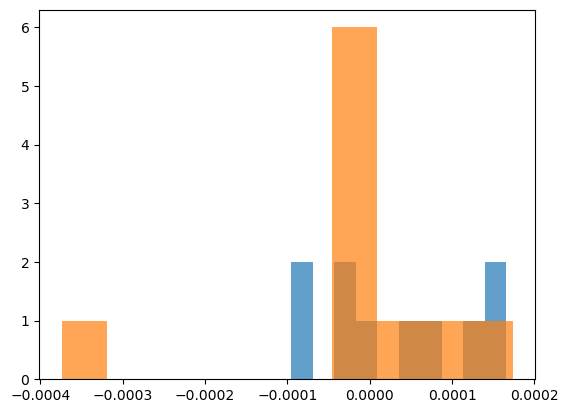

In [189]:

plt.hist(experiments[0][1][-1]['outgoing_H_eigs'],alpha=.7)

plt.hist(experiments[1][1][-1]['outgoing_H_eigs'],alpha=0.7)

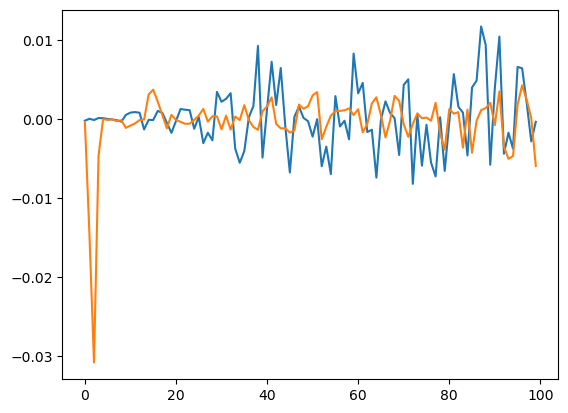

In [57]:
import seaborn as sns 
import matplotlib.pyplot as plt 

col = 'incoming_ip_dw1_dw2,w1_w2'
df = pd.DataFrame(experiments[0][1])
df = df.loc[df.phase==1]
plt.plot(df[col].values[:100])
df = pd.DataFrame(experiments[-1][1])
df = df.loc[df.phase==1]
plt.plot(df[col].values[:100])

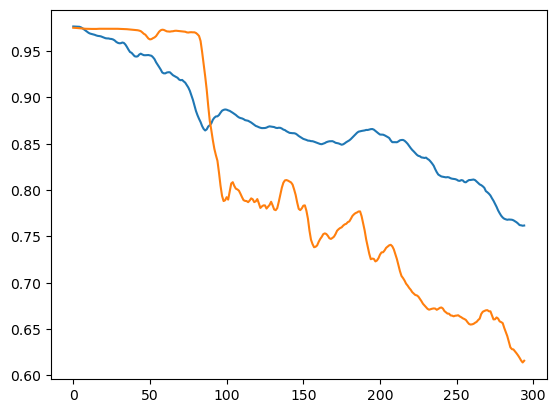

In [52]:
col = 'incoming_cos_w1_w2'
df = pd.DataFrame(experiments[0][1])
df = df.loc[df.phase==1]
plt.plot(df[col].values)
df = pd.DataFrame(experiments[-1][1])
df = df.loc[df.phase==1]
plt.plot(df[col].values)

In [6]:
experiments[0][1]

[]

In [18]:
class ConfigurableMLP(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_sizes, activation_type='relu'):
        super(ConfigurableMLP, self).__init__()
        
        # Set activation function based on input parameter
        if activation_type == 'relu':
            self.activation = nn.ReLU()
        elif activation_type == 'tanh':
            self.activation = nn.Tanh()
        elif activation_type == 'sigmoid':
            self.activation = nn.Sigmoid()
        else:
            raise ValueError(f"Unsupported activation type: {activation_type}")
        
        # Create layers list starting with flattening the input
        self.flatten = nn.Flatten()
        
        # Build layer architecture
        layer_sizes = [input_dim] + hidden_sizes + [output_dim]
        self.layers = nn.ModuleList()
        
        for i in range(len(layer_sizes) - 1):
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i+1]))
            
    def forward(self, x):
        x = self.flatten(x)
        
        for i, layer in enumerate(self.layers):
            x = layer(x)
            # Apply activation to all but the last layer
            if i < len(self.layers) - 1:
                x = self.activation(x)
                
        return x
    
    def get_layer_weights(self, layer_idx):
        """Return the weight matrix of a specific layer"""
        return self.layers[layer_idx].weight


input_dim, output_dim = 2, 10
criterion = nn.CrossEntropyLoss()
model = ConfigurableMLP(input_dim, output_dim, [3,5],'relu')
x, y = torch.randn(10, input_dim), torch.randint(output_dim, (10,))
out = model(x)
loss = criterion(out, y)
loss.backward()

In [20]:
model.layers[0].weight.shape

torch.Size([3, 2])

In [172]:

    


input_dim, output_dim = 2, 10
criterion = nn.CrossEntropyLoss()
model = ConfigurableMLP(input_dim, output_dim, [500]*5,'tanh')

layer_index = 1
row_indices = [1, 2]
col_indices = [1]


unit_i, unit_j = 0, 1

# hess1 = layer_hessian(model, criterion, layer_index, row_indices=[unit_i, unit_j], col_indices=sampled_units)
# hess2 = layer_hessian(model, criterion, layer_index+1, row_indices=sampled_units, col_indices=[unit_i, unit_j])

x, y = torch.randn(500, input_dim), torch.randint(output_dim, (500,))
couping_hessian(x, y, model, criterion, layer_index, unit_i, unit_j, sampling_n=10)


(tensor([-4.4407e-04, -2.9247e-05, -5.5539e-06, -2.2411e-06, -8.3921e-07,
          1.8183e-08,  7.7966e-08,  8.6991e-07,  4.1198e-06,  8.3437e-05],
        grad_fn=<LinalgEighBackward0>),
 tensor([-3.4226e-05, -2.4974e-05, -1.8843e-05, -8.7553e-06,  4.3869e-06,
          2.3479e-05,  2.5846e-05,  3.9545e-05,  4.2279e-05,  5.9186e-05],
        grad_fn=<LinalgEighBackward0>))

In [158]:
B1.shape, B2.shape

(torch.Size([2, 2]), torch.Size([20, 20]))

In [96]:
row_indices = [1, 2]
col_indices = [1]
n = len(row_indices)
m = len(col_indices)
N, M = model.layers[layer_index].weight.shape 
R = torch.eye(N)[:,row_indices]
C = torch.eye(M)[col_indices,:]

w = torch.zeros((n,m))
b = torch.zeros((n))

W = R @ w @ C
B = R @ b

R.shape, C.shape, w.shape, b.shape, W.shape, B.shape, model.layers[layer_index].weight.shape ,model.layers[layer_index].bias.shape 

(torch.Size([3, 2]),
 torch.Size([1, 2]),
 torch.Size([2, 1]),
 torch.Size([2]),
 torch.Size([3, 2]),
 torch.Size([3]),
 torch.Size([3, 2]),
 torch.Size([3]))

In [82]:
n,m

(3, 2)

Final angle between w1, w2 (in degrees): 0.04
Final angle between g1, g2 (in degrees): -0.48


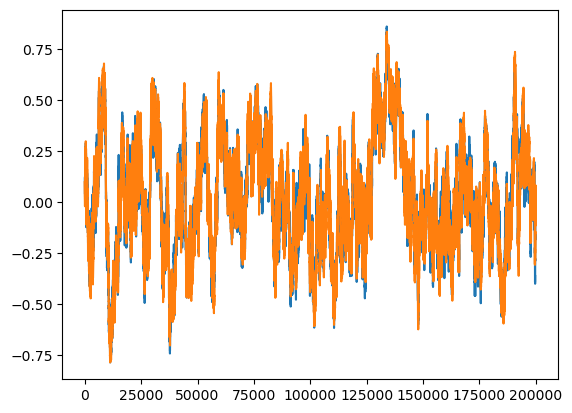

In [33]:
import torch
import math
import matplotlib.pyplot as plt

# Set a reproducible random seed
# torch.manual_seed(42)

# --------------
# Hyperparameters
# --------------
d = 100            # dimension of w_i, g_i
num_steps = 200000
eta = 0.01     # learning rate

# Activation f and derivative f'(z)
def f(z):
    return torch.tanh(z)

def fprime(z):
    # Derivative of tanh(z) = 1 - tanh^2(z)
    return 1. - torch.tanh(z)**2

# def f(z):
#     return torch.max(z, 0)[0]
# def fprime(z):
#     return (z>0).float()

# --------------
# Initialization
# --------------
# For simplicity, initialize w1, w2, g1, g2 randomly on the unit sphere
def random_unit_vector(dim):
    v = torch.randn(dim)
    v = v / v.norm()
    return v

w1 = random_unit_vector(d)
w2 = random_unit_vector(d)
g1 = random_unit_vector(d)
g2 = random_unit_vector(d)

w2 = w2/w2.norm()
g2 = g2/g2.norm()

# --------------
# Helper to measure angles
# --------------
def angle_between(u, v):
    # angle in [0, pi], computed via dot product
    cos = (u @ v) / (u.norm() * v.norm())
    # Clip numerical noise in case cos>1 or cos<-1
    cos = torch.clamp(cos, -1.0, 1.0)
    # return torch.acos(cos).item()
    return cos.item()

# --------------
# Store angles over time
# --------------
angles_w = []
angles_g = []

for step in range(num_steps):
    # Sample x ~ N(0, I_d)
    x = torch.randn(d)
    # Sample b ~ N(0, I_d)
    b = torch.randn(d)

    # Forward pass
    z1 = w1 @ x
    z2 = w2 @ x
    h1 = f(z1)
    h2 = f(z2)
    # y1 = g1 * h1, y2 = g2 * h2 (vector outputs)
    # But for the gradient update, we only need the dot(b, y_i) terms.

    # Compute gradients wrt w1, w2
    # grad_w1 = (b . g1) * f'(z1) * x
    # note: (b . g1) is a scalar
    grad_w1 = (b @ g1) * fprime(z1) * x
    grad_w2 = (b @ g2) * fprime(z2) * x

    # Compute gradients wrt g1, g2
    # grad_g1 = b * f(z1) = b * h1
    grad_g1 = b * h1
    grad_g2 = b * h2

    # Gradient descent updates
    w1 = w1 - eta * grad_w1
    w2 = w2 - eta * grad_w2
    g1 = g1 - eta * grad_g1
    g2 = g2 - eta * grad_g2

    # Renormalize to have unit norm
    w1 = w1 / w1.norm()
    w2 = w2 / w2.norm()
    g1 = g1 / g1.norm()
    g2 = g2 / g2.norm()

    # Record angles
    angles_w.append(angle_between(w1, w2))
    angles_g.append(angle_between(g1, g2))


# After the loop, examine final angles
final_angle_w = angles_w[-1]
final_angle_g = angles_g[-1]
print(f"Final angle between w1, w2 (in degrees): {final_angle_w*180/math.pi:.2f}")
print(f"Final angle between g1, g2 (in degrees): {final_angle_g*180/math.pi:.2f}")

plt.plot(angles_w)
plt.plot(angles_g)

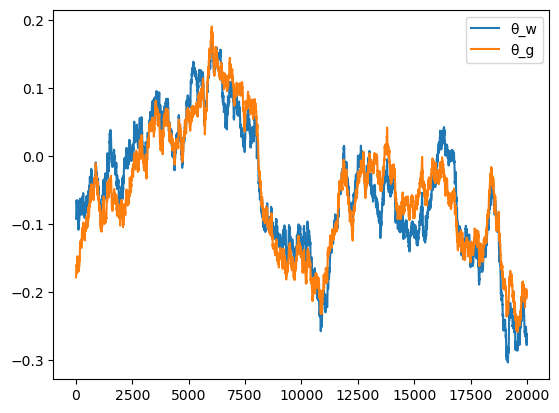

In [36]:
import torch
import matplotlib.pyplot as plt

d = 100
lambda_lr = 0.001
steps = 20000

# Initialize unit vectors
w1 = torch.randn(d); w1 /= w1.norm()
w2 = torch.randn(d); w2 /= w2.norm()
g1 = torch.randn(d); g1 /= g1.norm()
g2 = torch.randn(d); g2 /= g2.norm()

theta_w_history = []
theta_g_history = []

for i in range(steps):
    x = torch.randn(d)
    b = torch.randn(d)
    
    z1 = w1 @ x; z2 = w2 @ x
    h1 = torch.tanh(z1); h2 = torch.tanh(z2)  # Non-linear activation
    f_prime1 = 1 - h1**2; f_prime2 = 1 - h2**2

    if i%4==0:
        grad_w1,grad_w2,grad_g1,grad_g2 = 0,0,0,0
    grad_w1 += f_prime1 * (g1 @ b) * x
    grad_w2 += f_prime2 * (g2 @ b) * x
    grad_g1 += h1 * b
    grad_g2 += h2 * b
    
    w1 = w1 - lambda_lr * grad_w1; w1 /= w1.norm()
    w2 = w2 - lambda_lr * grad_w2; w2 /= w2.norm()
    g1 = g1 - lambda_lr * grad_g1; g1 /= g1.norm()
    g2 = g2 - lambda_lr * grad_g2; g2 /= g2.norm()
    
    theta_w = (w1 @ w2).item()
    theta_g = (g1 @ g2).item()
    theta_w_history.append(theta_w)
    theta_g_history.append(theta_g)

plt.plot(theta_w_history, label='θ_w')
plt.plot(theta_g_history, label='θ_g')
plt.legend()
plt.show()